# Speech Signal Processing for Prosody - Semantics/Pragmatics Mapping

(C) 2018 by Damir Cavar, ...

## Introduction

...

## Librosa for Feature Extraction

In [22]:
import librosa, glob
import matplotlib.pyplot as plt

### Root-Mean-Square (RMS) Energy for Each Frame

For all wav-files in the folder, load them and compute the RMSE vectors:

Analyzing: A_man_bought_a_car_in_Paris-DC-1.wav
Sampling rate: 22050
Data: [0.06292599 0.10072903 0.08818848 ... 0.0711128  0.07241075 0.08281992]
Analyzing: A_man_bought_a_car_in_Paris-DC-2.wav
Sampling rate: 22050
Data: [-0.01947346 -0.03268886 -0.02724907 ...  0.20243706  0.19471705
  0.20985296]
Analyzing: A_man_bought_a_car_in_Paris-DC-3.wav
Sampling rate: 22050
Data: [-0.01711488 -0.02417012 -0.02028691 ...  0.03192561  0.03144105
  0.03378823]
Analyzing: A_man_bought_a_car_in_Paris-DC-4.wav
Sampling rate: 22050
Data: [-0.06278183 -0.09556913 -0.08817008 ...  0.07745856  0.07417533
  0.08125334]
Analyzing: A_man_bought_a_car_in_Paris-DC-5.wav
Sampling rate: 22050
Data: [-0.02079646 -0.02943527 -0.02634321 ...  0.01917527  0.01791094
  0.01906   ]


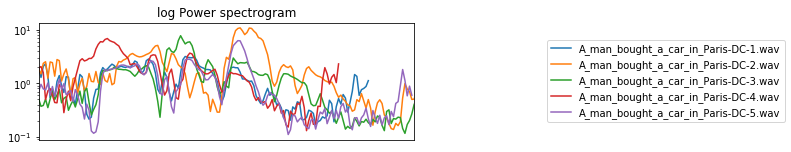

In [20]:
plt.figure()
plt.subplot(2, 1, 1)


file_list = ( "A_man_bought_a_car_in_Paris-DC-1.wav",
             "A_man_bought_a_car_in_Paris-DC-2.wav",
            "A_man_bought_a_car_in_Paris-DC-3.wav",
             "A_man_bought_a_car_in_Paris-DC-4.wav",
            "A_man_bought_a_car_in_Paris-DC-5.wav")

for wav in file_list: # glob.glob("*.wav"):
    print("Analyzing:", wav)
    y, sr = librosa.load(wav)
    librosa.feature.rmse(y=y)
    print("Sampling rate:", sr)
    print("Data:", y)
    S, phase = librosa.magphase(librosa.stft(y))
    rms = librosa.feature.rmse(S=S)
    plt.semilogy(rms.T, label=wav) # 'RMS Energy')
    plt.xticks([])
    plt.xlim([0, rms.shape[-1]])
    plt.legend(loc='right', bbox_to_anchor=(2, 0.5))
    # plt.subplot(2, 1, 2)
    #librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
    plt.title('log Power spectrogram')
    plt.tight_layout()

Plot the scores over time:

### Use Google Speech API for Speech recognition

We need the module [SpeechRecognition](https://pypi.org/project/SpeechRecognition/):

In [34]:
import speech_recognition as sr
from pprint import pprint

See for more details on how to use the SpeechRecognition module [here](https://github.com/Uberi/speech_recognition/blob/master/examples/audio_transcribe.py).

In [35]:
r = sr.Recognizer()
with sr.AudioFile("A_man_bought_a_car_in_Paris-DC-2.wav") as source:
    audio = r.record(source)  # read the entire audio file
pprint(r.recognize_google(audio, show_all=True))

{'alternative': [{'confidence': 0.95500749,
                  'transcript': 'a man bought a car in Paris'},
                 {'transcript': 'a man bought the car in Paris'},
                 {'transcript': 'a man bought car in Paris'},
                 {'transcript': 'a man bought a car in Perris'}],
 'final': True}


We need to get the timing information, that is the Word Timestamps for the transcription that the ASR returns.

### Use Google Cloud Services directly to find timestamps to mono wav files

In [1]:
import io
import os
def transcribe_file(speech_file):
    """Transcribe the given mono audio wav file."""
    from google.cloud import speech
    from google.cloud.speech import enums
    from google.cloud.speech import types
    client = speech.SpeechClient()

    with io.open(speech_file, 'rb') as audio_file:
        content = audio_file.read()

    audio = types.RecognitionAudio(content=content)
    config = types.RecognitionConfig(
        encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=44100,
        language_code='en-US',
        enable_word_time_offsets=True)

    operation = client.long_running_recognize(config, audio)

    print('Waiting for operation to complete...')
    result = operation.result(timeout=90)
    # Each result is for a consecutive portion of the audio. Iterate through
    # them to get the transcripts for the entire audio file.
    for result in result.results:
        alternative = result.alternatives[0]
        print(u'Transcript: {}'.format(alternative.transcript))
        print('Confidence: {}'.format(alternative.confidence))

        for word_info in alternative.words:
            word = word_info.word
            start_time = word_info.start_time
            end_time = word_info.end_time
            print('Word: {}, start_time: {}, end_time: {}'.format(
                word,
                start_time.seconds + start_time.nanos * 1e-9,
                end_time.seconds + end_time.nanos * 1e-9))

#Enter .wav file path here
transcribe_file("/Users/abhi/Desktop/speechsignal/speechsignal/doc/Sample Recordings/goat.wav")

Waiting for operation to complete...
Transcript: Michael Jordan is the greatest basketball player of all time
Confidence: 0.9881243109703064
Word: Michael, start_time: 1.2, end_time: 2.0
Word: Jordan, start_time: 2.0, end_time: 2.4
Word: is, start_time: 2.4, end_time: 2.9
Word: the, start_time: 2.9, end_time: 3.0
Word: greatest, start_time: 3.0, end_time: 3.3
Word: basketball, start_time: 3.3, end_time: 3.8
Word: player, start_time: 3.8, end_time: 4.4
Word: of, start_time: 4.4, end_time: 4.8
Word: all, start_time: 4.8, end_time: 5.1
Word: time, start_time: 5.1, end_time: 5.5
Transcript:  by a long shot
Confidence: 0.8628273010253906
Word: by, start_time: 7.2, end_time: 7.6
Word: a, start_time: 7.6, end_time: 7.7
Word: long, start_time: 7.7, end_time: 8.0
Word: shot, start_time: 8.0, end_time: 8.2
